In [1]:
# Importing Files
import numpy as np
import pandas as pd
import seaborn as sn
import keras 
from keras import models
from keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from keras import regularizers

Using TensorFlow backend.


In [2]:
train_data = pd.read_csv('loan_data.csv')
test_data = pd.read_csv('test_data.csv')

In [3]:
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [4]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


/home/ibadi123/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ibadi123/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/ibadi123/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


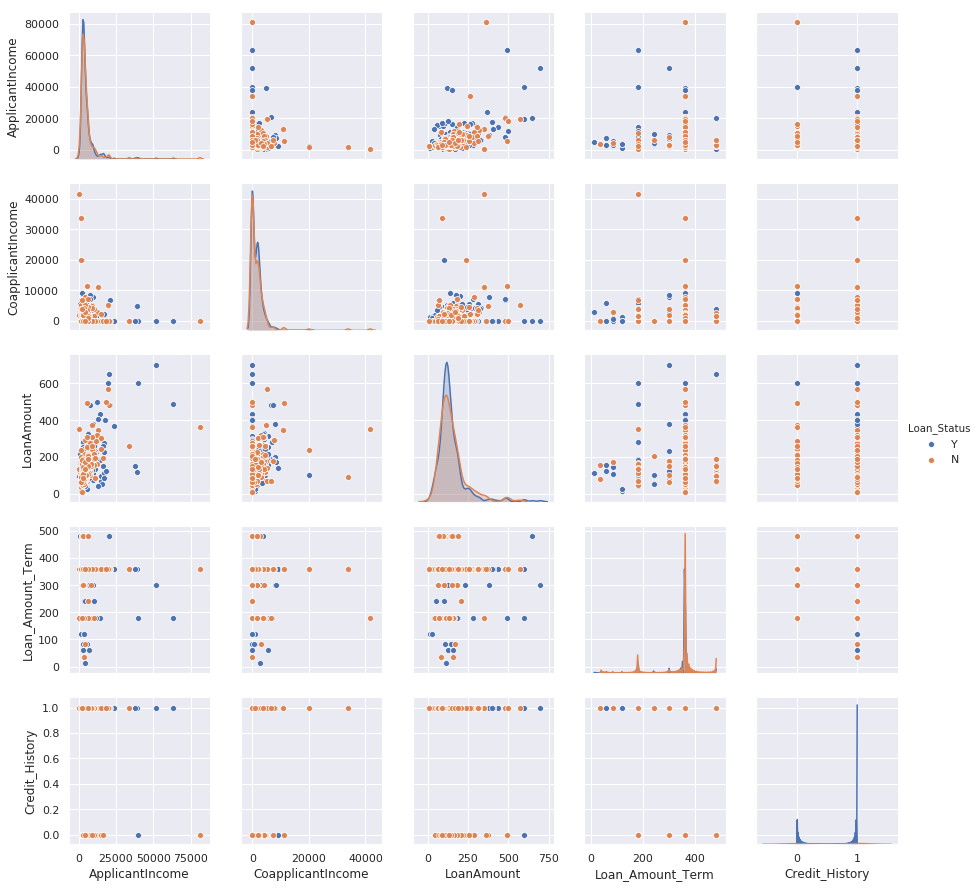

In [5]:
sn.set()
sn.pairplot(data=train_data, hue="Loan_Status");

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [7]:
# Dropping Loan_ID, Gender and Property_Area
train_data = train_data.drop(['Loan_ID', 'Gender', 'Property_Area'], axis = 1)
test_data = test_data.drop(['Loan_ID', 'Gender', 'Property_Area'], axis = 1)

In [8]:
train_data

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y
5,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Y
6,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Y
7,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,N
8,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Y
9,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,N


In [9]:
train_data = train_data.replace("Yes",1)
train_data = train_data.replace("No",0)
train_data = train_data.replace("Graduate",1)
train_data = train_data.replace("Not Graduate",0)
train_data = train_data.replace("Y",1)
train_data = train_data.replace("N",0)

test_data = test_data.replace("Yes",1)
test_data = test_data.replace("No",0)
test_data = test_data.replace("Graduate",1)
test_data = test_data.replace("Not Graduate",0)
test_data = test_data.replace("Y",1)
test_data = test_data.replace("N",0)

In [10]:
train_data

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,1
1,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1
3,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1
4,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1
5,1.0,2,1,1.0,5417,4196.0,267.0,360.0,1.0,1
6,1.0,0,0,0.0,2333,1516.0,95.0,360.0,1.0,1
7,1.0,3+,1,0.0,3036,2504.0,158.0,360.0,0.0,0
8,1.0,2,1,0.0,4006,1526.0,168.0,360.0,1.0,1
9,1.0,1,1,0.0,12841,10968.0,349.0,360.0,1.0,0


In [11]:
# Filling the NaN values in the Dataset
train_data = train_data.fillna(0)
test_data = test_data.fillna(0)

In [12]:
train_data

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0.0,0,1,0.0,5849,0.0,0.0,360.0,1.0,1
1,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1
3,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1
4,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1
5,1.0,2,1,1.0,5417,4196.0,267.0,360.0,1.0,1
6,1.0,0,0,0.0,2333,1516.0,95.0,360.0,1.0,1
7,1.0,3+,1,0.0,3036,2504.0,158.0,360.0,0.0,0
8,1.0,2,1,0.0,4006,1526.0,168.0,360.0,1.0,1
9,1.0,1,1,0.0,12841,10968.0,349.0,360.0,1.0,0


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
Married              614 non-null float64
Dependents           614 non-null object
Education            614 non-null int64
Self_Employed        614 non-null float64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Loan_Status          614 non-null int64
dtypes: float64(6), int64(3), object(1)
memory usage: 48.0+ KB


In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 9 columns):
Married              367 non-null int64
Dependents           367 non-null object
Education            367 non-null int64
Self_Employed        367 non-null float64
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
dtypes: float64(4), int64(4), object(1)
memory usage: 25.9+ KB


In [15]:
train_targets = train_data['Loan_Status']

In [16]:
train_data = train_data.drop('Loan_Status',axis = 1)

In [17]:
train_data.shape

(614, 9)

In [18]:
train_data.Dependents.unique()

array(['0', '1', '2', '3+', 0], dtype=object)

In [19]:
train_data = train_data.replace("3+",3)
test_data = test_data.replace("3+",3)

In [20]:
train_data = train_data.astype('float64')
test_data = test_data.astype('float64')

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
Married              614 non-null float64
Dependents           614 non-null float64
Education            614 non-null float64
Self_Employed        614 non-null float64
ApplicantIncome      614 non-null float64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
dtypes: float64(9)
memory usage: 43.2 KB


In [22]:
train_data = pd.DataFrame(train_data)

In [23]:
train_data

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,0.0,1.0,0.0,5849.0,0.0,0.0,360.0,1.0
1,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0
2,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0
3,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0
4,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0
5,1.0,2.0,1.0,1.0,5417.0,4196.0,267.0,360.0,1.0
6,1.0,0.0,0.0,0.0,2333.0,1516.0,95.0,360.0,1.0
7,1.0,3.0,1.0,0.0,3036.0,2504.0,158.0,360.0,0.0
8,1.0,2.0,1.0,0.0,4006.0,1526.0,168.0,360.0,1.0
9,1.0,1.0,1.0,0.0,12841.0,10968.0,349.0,360.0,1.0


In [24]:
# Processing Data
scalar = MinMaxScaler()
train_data = scalar.fit_transform(train_data)
test_data = scalar.fit_transform(test_data)
# Converting the Data into Cateogrical Form
train_data = StandardScaler().fit_transform(train_data)
test_data = StandardScaler().fit_transform(test_data)
train_targets = LabelBinarizer().fit_transform(train_targets)

In [25]:
X = train_data

In [26]:
Y = train_targets

In [27]:
Y

array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
    

In [28]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l1(0.01), input_shape=(9,)))
    model.add(layers.Dense(9, kernel_regularizer=regularizers.l1(0.01), activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))
    
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [29]:
# K - Fold Validation Init
k = 3
num_val_samples = len(X) // k
num_epochs = 50
all_acc_history = []
all_val_acc_history = []

In [30]:
for i in range(k):
    print('processing fold #', i)
    
    val_data = X[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = Y[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([X[:i * num_val_samples], X[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([Y[:i * num_val_samples], Y[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    
    history = model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 10, validation_data = (val_data, val_targets))
    
    acc_history = history.history['acc']
    val_acc_history = history.history['val_acc']
    
    all_acc_history.append(acc_history)
    all_val_acc_history.append(val_acc_history)
    

processing fold # 0
Train on 410 samples, validate on 204 samples
Epoch 1/50
410/410 [==============================] - 0s 953us/step - loss: 1.3511 - acc: 0.6146 - val_loss: 1.2889 - val_acc: 0.6520
Epoch 2/50
410/410 [==============================] - 0s 264us/step - loss: 1.2693 - acc: 0.6634 - val_loss: 1.2183 - val_acc: 0.6716
Epoch 3/50
410/410 [==============================] - 0s 256us/step - loss: 1.1971 - acc: 0.6976 - val_loss: 1.1556 - val_acc: 0.6814
Epoch 4/50
410/410 [==============================] - 0s 262us/step - loss: 1.1317 - acc: 0.7098 - val_loss: 1.0974 - val_acc: 0.6814
Epoch 5/50
410/410 [==============================] - 0s 247us/step - loss: 1.0731 - acc: 0.7146 - val_loss: 1.0449 - val_acc: 0.6814
Epoch 6/50
410/410 [==============================] - 0s 257us/step - loss: 1.0209 - acc: 0.7171 - val_loss: 0.9969 - val_acc: 0.6765
Epoch 7/50
410/410 [==============================] - 0s 249us/step - loss: 0.9703 - acc: 0.7268 - val_loss: 0.9500 - val_acc: 0.7

Epoch 11/50
410/410 [==============================] - 0s 255us/step - loss: 0.7765 - acc: 0.7537 - val_loss: 0.7579 - val_acc: 0.7451
Epoch 12/50
410/410 [==============================] - 0s 209us/step - loss: 0.7470 - acc: 0.7561 - val_loss: 0.7322 - val_acc: 0.7549
Epoch 13/50
410/410 [==============================] - 0s 226us/step - loss: 0.7207 - acc: 0.7707 - val_loss: 0.7101 - val_acc: 0.7500
Epoch 14/50
410/410 [==============================] - 0s 233us/step - loss: 0.6979 - acc: 0.7829 - val_loss: 0.6910 - val_acc: 0.7598
Epoch 15/50
410/410 [==============================] - 0s 213us/step - loss: 0.6795 - acc: 0.7829 - val_loss: 0.6754 - val_acc: 0.7598
Epoch 16/50
410/410 [==============================] - 0s 222us/step - loss: 0.6636 - acc: 0.7780 - val_loss: 0.6613 - val_acc: 0.7598
Epoch 17/50
410/410 [==============================] - 0s 228us/step - loss: 0.6503 - acc: 0.7780 - val_loss: 0.6496 - val_acc: 0.7598
Epoch 18/50
410/410 [==============================] - 

410/410 [==============================] - 0s 231us/step - loss: 0.6706 - acc: 0.7561 - val_loss: 0.6708 - val_acc: 0.7843
Epoch 22/50
410/410 [==============================] - 0s 210us/step - loss: 0.6617 - acc: 0.7561 - val_loss: 0.6623 - val_acc: 0.7843
Epoch 23/50
410/410 [==============================] - 0s 225us/step - loss: 0.6534 - acc: 0.7585 - val_loss: 0.6517 - val_acc: 0.7843
Epoch 24/50
410/410 [==============================] - 0s 232us/step - loss: 0.6459 - acc: 0.7561 - val_loss: 0.6430 - val_acc: 0.7843
Epoch 25/50
410/410 [==============================] - 0s 233us/step - loss: 0.6396 - acc: 0.7561 - val_loss: 0.6361 - val_acc: 0.7892
Epoch 26/50
410/410 [==============================] - 0s 231us/step - loss: 0.6342 - acc: 0.7585 - val_loss: 0.6311 - val_acc: 0.7892
Epoch 27/50
410/410 [==============================] - 0s 225us/step - loss: 0.6301 - acc: 0.7561 - val_loss: 0.6237 - val_acc: 0.7892
Epoch 28/50
410/410 [==============================] - 0s 216us/ste

In [31]:
average_acc_history = [ np.mean([x[i] for x in all_acc_history]) for i in range(num_epochs) ]
average_val_acc_history = [ np.mean([x[i] for x in all_val_acc_history]) for i in range(num_epochs) ]

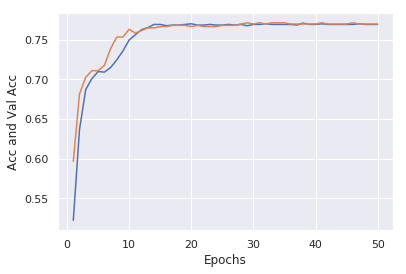

In [32]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_acc_history) + 1), average_acc_history)
plt.plot(range(1, len(average_val_acc_history) + 1), average_val_acc_history)
plt.xlabel('Epochs')
plt.ylabel('Acc and Val Acc')
plt.show()

In [33]:
max(average_acc_history)

0.7707317066871053

In [34]:
max(average_val_acc_history)

0.7712418341558743

In [35]:
#model = build_model()
#model.fit(train_data, train_targets, epochs = 50, batch_size = 10)

In [36]:
#model.predict(test_data)